# Holiday Package Prediction

### 1) Problem Statement

"Trips & Travel.com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are five types of packages the company is offering. They are Basic, Standard, Deluxe, Super Deluxe and King, Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance oro kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

### 2) Data Collection

The dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction It consists of 20 columns and 4888 rows

In [52]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [53]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


DATA CLEANING

- Handling Missing Values
- Handling Duplicates
- Check Data Type
- Understand the Dataset

In [54]:
# Check missing values
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [55]:
# Check all the categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [56]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

In [57]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [58]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [59]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [60]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [61]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [62]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [63]:
## Checking Missing Values

# These are the features with nan value

features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]

In [64]:
features_with_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [65]:
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean() * 100, 5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [66]:
# Statistics on numerical columns(NULL COLS)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values

1. Impute Median  for 'Age' column
2. Impute Mode for 'TypeofContact' column
3. Impute Median for 'DurationOfPitch' column
4. Impute Mode for 'NumberofFollowups' column as it is discrete feature
5. Impute Mode for 'PreferredPropertyStar' column
6. Impute Median for 'NumberOfTrips' column
7. Impute Mode for 'NumberOfChildrenVisiting' column
8. Impute Median for 'MonthlyIncome' column

In [67]:
# Age
df.Age.fillna(df.Age.median(), inplace=True)

# TypeofContact
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

# DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

# NumberofFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

# PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

# NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

# NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

# MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [68]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [69]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [70]:
df.drop('CustomerID', axis=1, inplace=True)

In [71]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Feature Engineering

#### Feature Extraction

In [72]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [73]:
# Create a new column TotalVisits
df['TotalVisits'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [74]:
## Get all the numerical columns
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  12


In [75]:
# Get all the categorical columns
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical features: ', len(categorical_features))

Number of categorical features:  6


In [76]:
# Discrete features
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]
print('Number of discrete features: ', len(discrete_features))

Number of discrete features:  9


In [77]:
# Continuous features
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print('Number of continuous features: ', len(continuous_features))

Number of continuous features:  3


In [78]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisits
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


Train Test Split and Model Training

In [79]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [80]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisits
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [81]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [82]:
## Separate the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [85]:
# Create Column Transformer with 3 types of transformers

cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [86]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisits'],
      dtype='object'))])

In [87]:
# Apply Transformation in training set(fit_transform)
X_train = preprocessor.fit_transform(X_train)

In [88]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.7214,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.7214,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382


In [89]:
# Apply Transformation on test(transform)
X_test = preprocessor.transform(X_test)

In [47]:
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.73751038, -0.77415132],
       [ 1.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.6704111 , -0.06526803],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.4208322 , -0.77415132],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
         0.69001249,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.22827818, -0.77415132],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.44611323,  2.06138184]])

Machine Learning Model Training

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [92]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    mode_train_accuracy = accuracy_score(y_train, y_train_pred) # calculate accuracy
    model_train_f1 = f1_score(y_train, y_train_pred) # calculate f1 score
    model_train_precision = precision_score(y_train, y_train_pred) # calculate precision
    model_train_recall = recall_score(y_train, y_train_pred) # calculate recall
    model_train_roc_auc = roc_auc_score(y_train, y_train_pred) # calculate roc_auc

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # calculate accuracy
    model_test_f1 = f1_score(y_test, y_test_pred) # calculate f1 score
    model_test_precision = precision_score(y_test, y_test_pred) # calculate precision
    model_test_recall = recall_score(y_test, y_test_pred) # calculate recall
    model_test_roc_auc = roc_auc_score(y_test, y_test_pred) # calculate roc_auc

    print(f"Model: {list(models.keys())[i]}")

    print("Training set performance")
    print("Accuracy: {:.4f}".format(mode_train_accuracy))
    print("F1 Score: {:.4f}".format(model_train_f1))
    print("Precision: {:.4f}".format(model_train_precision))
    print("Recall: {:.4f}".format(model_train_recall))
    print("ROC AUC: {:.4f}".format(model_train_roc_auc))

    print("\nTest set performance")
    print("Accuracy: {:.4f}".format(model_test_accuracy))
    print("F1 Score: {:.4f}".format(model_test_f1))
    print("Precision: {:.4f}".format(model_test_precision))
    print("Recall: {:.4f}".format(model_test_recall))
    print("ROC AUC: {:.4f}\n".format(model_test_roc_auc))

Model: Logistic Regression
Training set performance
Accuracy: 0.8460
F1 Score: 0.4234
Precision: 0.7016
Recall: 0.3032
ROC AUC: 0.6368

Test set performance
Accuracy: 0.8364
F1 Score: 0.4118
Precision: 0.6914
Recall: 0.2932
ROC AUC: 0.6307

Model: Decision Tree
Training set performance
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC: 1.0000

Test set performance
Accuracy: 0.9243
F1 Score: 0.8032
Precision: 0.8162
Recall: 0.7906
ROC AUC: 0.8737

Model: Random Forest
Training set performance
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC: 1.0000

Test set performance
Accuracy: 0.9315
F1 Score: 0.7926
Precision: 0.9697
Recall: 0.6702
ROC AUC: 0.8325



In [93]:
# Hyperparameter tuning
params = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 30, None, 40, 50],
    'min_samples_split': [2, 5, 15, 20],
    'max_features': [5, 7, 8, 'auto', 'sqrt']
}

In [94]:
params

{'n_estimators': [100, 200, 500, 1000],
 'max_depth': [10, 20, 30, None, 40, 50],
 'min_samples_split': [2, 5, 15, 20],
 'max_features': [5, 7, 8, 'auto', 'sqrt']}

In [95]:
# Models list for hyperparameter tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), params)
]

In [96]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'n_estimators': [100, 200, 500, 1000],
   'max_depth': [10, 20, 30, None, 40, 50],
   'min_samples_split': [2, 5, 15, 20],
   'max_features': [5, 7, 8, 'auto', 'sqrt']})]

In [97]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, param in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1
    )
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"------------------Best Parameters for {model_name}------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
------------------Best Parameters for RF------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


In [98]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=7, max_depth=None)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    mode_train_accuracy = accuracy_score(y_train, y_train_pred) # calculate accuracy
    model_train_f1 = f1_score(y_train, y_train_pred) # calculate f1 score
    model_train_precision = precision_score(y_train, y_train_pred) # calculate precision
    model_train_recall = recall_score(y_train, y_train_pred) # calculate recall
    model_train_roc_auc = roc_auc_score(y_train, y_train_pred) # calculate roc_auc

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # calculate accuracy
    model_test_f1 = f1_score(y_test, y_test_pred) # calculate f1 score
    model_test_precision = precision_score(y_test, y_test_pred) # calculate precision
    model_test_recall = recall_score(y_test, y_test_pred) # calculate recall
    model_test_roc_auc = roc_auc_score(y_test, y_test_pred) # calculate roc_auc

    print(f"Model: {list(models.keys())[i]}")

    print("Training set performance")
    print("Accuracy: {:.4f}".format(mode_train_accuracy))
    print("F1 Score: {:.4f}".format(model_train_f1))
    print("Precision: {:.4f}".format(model_train_precision))
    print("Recall: {:.4f}".format(model_train_recall))
    print("ROC AUC: {:.4f}".format(model_train_roc_auc))

    print("\nTest set performance")
    print("Accuracy: {:.4f}".format(model_test_accuracy))
    print("F1 Score: {:.4f}".format(model_test_f1))
    print("Precision: {:.4f}".format(model_test_precision))
    print("Recall: {:.4f}".format(model_test_recall))
    print("ROC AUC: {:.4f}\n".format(model_test_roc_auc))

Model: Random Forest
Training set performance
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC: 1.0000

Test set performance
Accuracy: 0.9335
F1 Score: 0.8000
Precision: 0.9701
Recall: 0.6806
ROC AUC: 0.8378



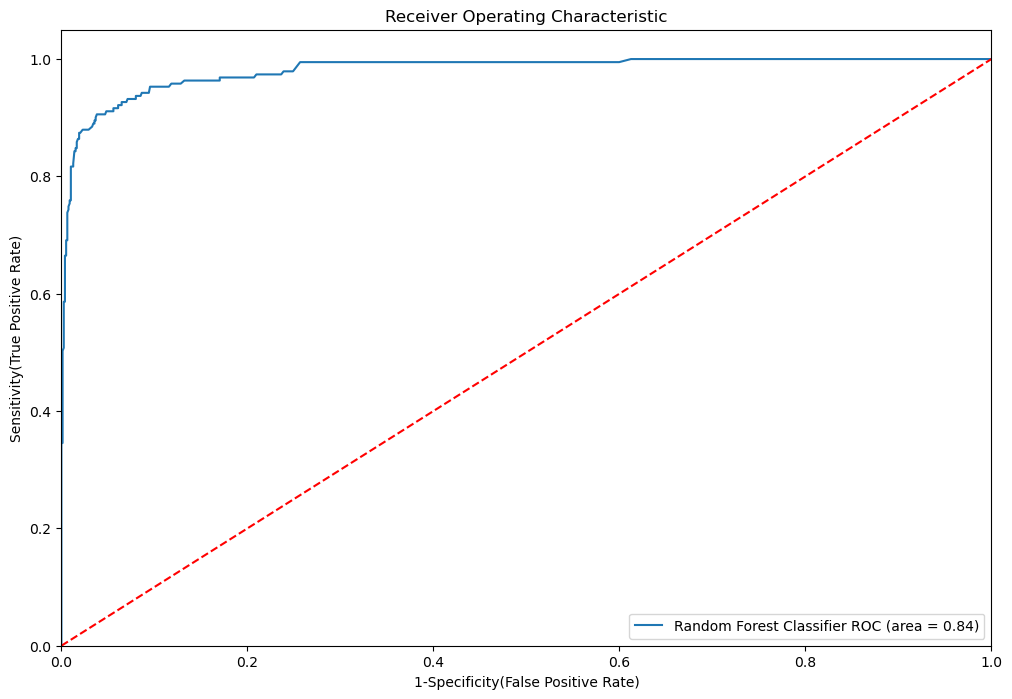

In [157]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure(figsize=(12, 8))

# Add models to the list we want to view on the ROC AUC curve
auc_models = [
    {
        "label": "Random Forest Classifier",
        "model": RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=8, max_depth=None),
         "auc": 0.8378
    }
]

# Create loop through all models

for algo in auc_models:
    model = algo['model'] # select the model

    model.fit(X_train, y_train) # train the model

    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("AUC.png")
plt.show()